In [1]:

# ===============================
# IMPORT LIBRARIES
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
# ===============================
# LOAD DATASET
# ===============================

data = pd.read_csv("creditcard.csv")

print("Dataset Loaded Successfully")
data.head()


Dataset Loaded Successfully


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# ===============================
# DATASET INFO
# ===============================

print("Shape of Dataset:", data.shape)
print("\nDataset Info:")
data.info()

print("\nClass Distribution:")
print(data['Class'].value_counts())


Shape of Dataset: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V2

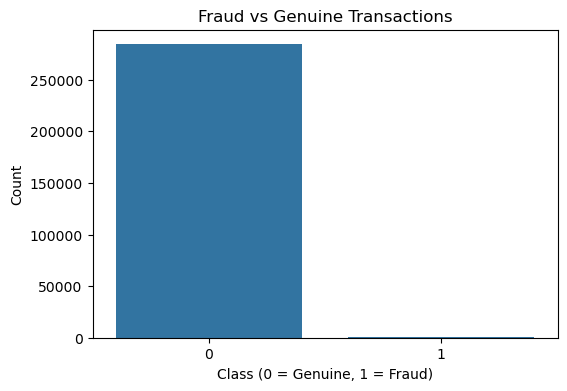

In [4]:
# ===============================
# CLASS DISTRIBUTION PLOT
# ===============================

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Genuine Transactions")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


In [5]:
# ===============================
# SCALE AMOUNT COLUMN
# ===============================

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
# Split first
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE on training data:")
print(pd.Series(y_train).value_counts())


After SMOTE on training data:
Class
0    227451
1    227451
Name: count, dtype: int64


In [13]:
# ===============================
# APPLY SMOTE ONLY ON TRAINING DATA
# ===============================

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE on training data:")
print(pd.Series(y_train).value_counts())


After SMOTE on training data:
Class
0    227451
1    227451
Name: count, dtype: int64


In [14]:
# ===============================
# TRAIN TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2, 
    random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (454904, 30)
Testing Data: (113726, 30)


In [15]:
# ===============================
# LOGISTIC REGRESSION
# ===============================

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9796528498320525

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

ROC AUC Score: 0.9796720956470427


In [16]:
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.999903276295658

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



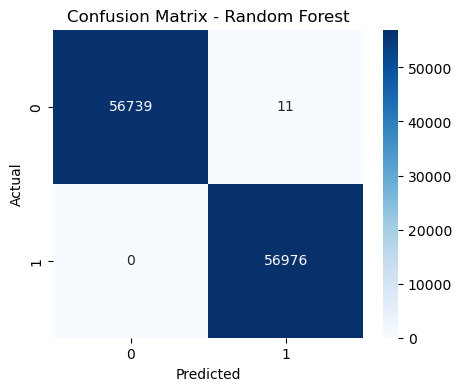

In [17]:
# ===============================
# CONFUSION MATRIX
# ===============================

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), 
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


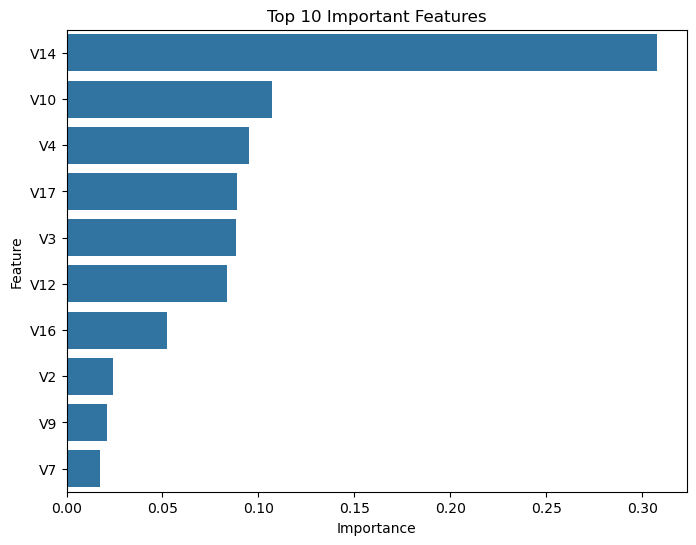

In [18]:
# ===============================
# FEATURE IMPORTANCE
# ===============================

importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', 
            data=feature_importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [19]:
# ===============================
# SAVE MODEL & SCALER
# ===============================

joblib.dump(rf, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler Saved Successfully")


Model and Scaler Saved Successfully


In [20]:
joblib.dump(rf, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [21]:
import joblib

joblib.dump(rf, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!
